In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sen

In [2]:
visa_df=pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**categorecal v/s categorecal**

In [3]:
cat=visa_df.select_dtypes(include=object).columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
num=visa_df.select_dtypes(exclude=object).columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**continent-case_status**

In [24]:
A=visa_df['continent'].value_counts()
pd.DataFrame(A)

,count
continent,
Asia,16861
Europe,3732
North America,3292
South America,852
Africa,551
Oceania,192


In [22]:
visa_df['has_job_experience'].value_counts()

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

In [6]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [7]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1&con2
len(visa_df[con])

11012

In [8]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Denied'
con=con1&con2
len(visa_df[con])

5849

In [9]:
continent=visa_df['continent'].value_counts()
for i,j in continent.items():
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con=con1&con2
    print(i,len(visa_df[con]))

Asia 11012
Europe 2957
North America 2037
South America 493
Africa 397
Oceania 122


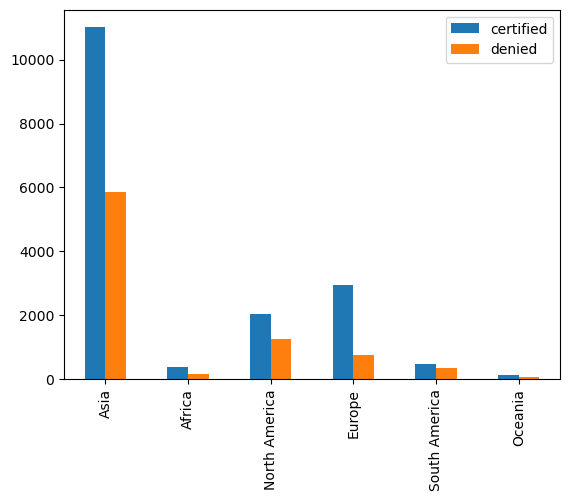

In [10]:
keys=visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in keys:
    con1=(visa_df['continent']==i)
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    denied_con=con1&con3
    certified_list.append(len(visa_df[certi_con]))
    denied_list.append(len(visa_df[denied_con]))
A=pd.DataFrame(zip(certified_list,denied_list),columns=['certified','denied'],index=keys)
A.plot(kind='bar')
plt.show()

In [11]:
certified_list
keys

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

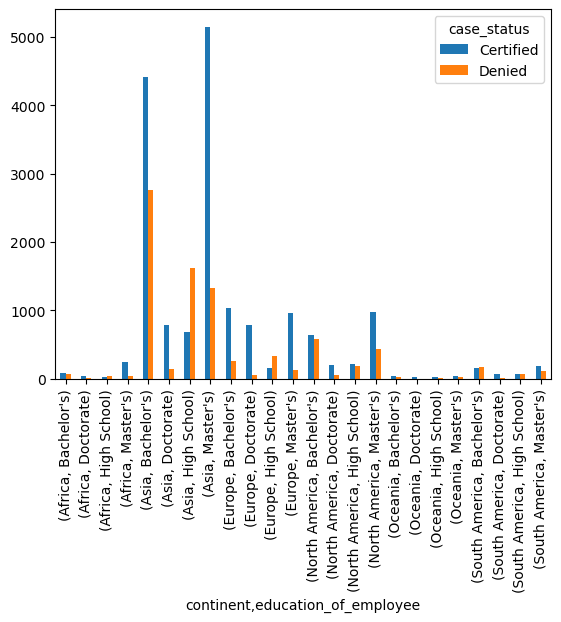

In [48]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result3=pd.crosstab(col,col3)
result3.plot(kind='bar')
plt.show()

In [23]:
result4=pd.crosstab(col1,col4)
result4

has_job_experience,N,Y
continent,,
Africa,217,334
Asia,7071,9790
Europe,1576,2156
North America,1348,1944
Oceania,89,103
South America,377,475


In [13]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='case_status'>

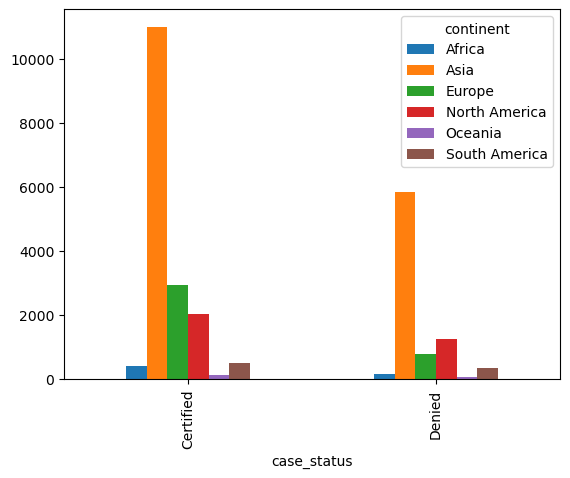

In [61]:
result2.plot(kind='bar' )

**Numerical-Numerical**

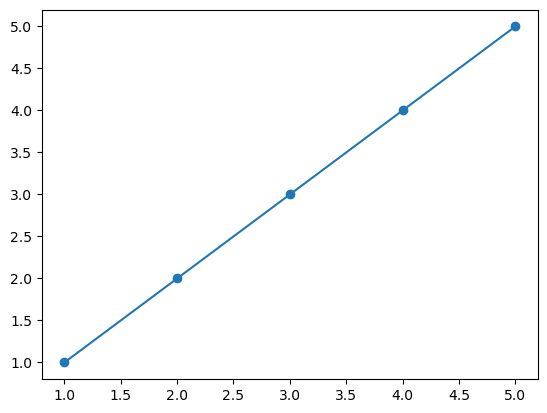

In [53]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

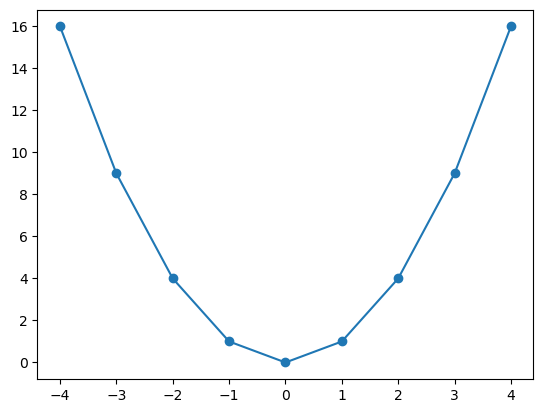

In [16]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

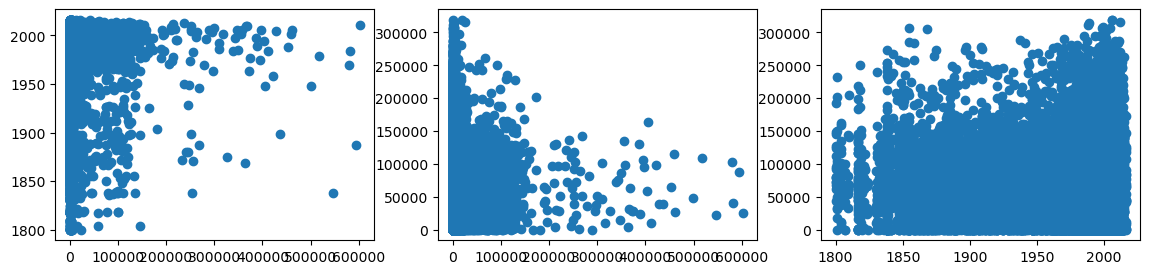

In [59]:
plt.figure(figsize=(14,3))
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)

col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)
plt.show()

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="21" data-atf="0">

In [18]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [65]:
wine=pd.read_csv(r'C:\data scinces\Naresh it\data scince\data folder\winequality_red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
wine1=wine.drop_duplicates()

In [68]:
wine1.iloc[1:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [70]:
len(wine1.columns)

12

In [71]:
wine1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**heat map**

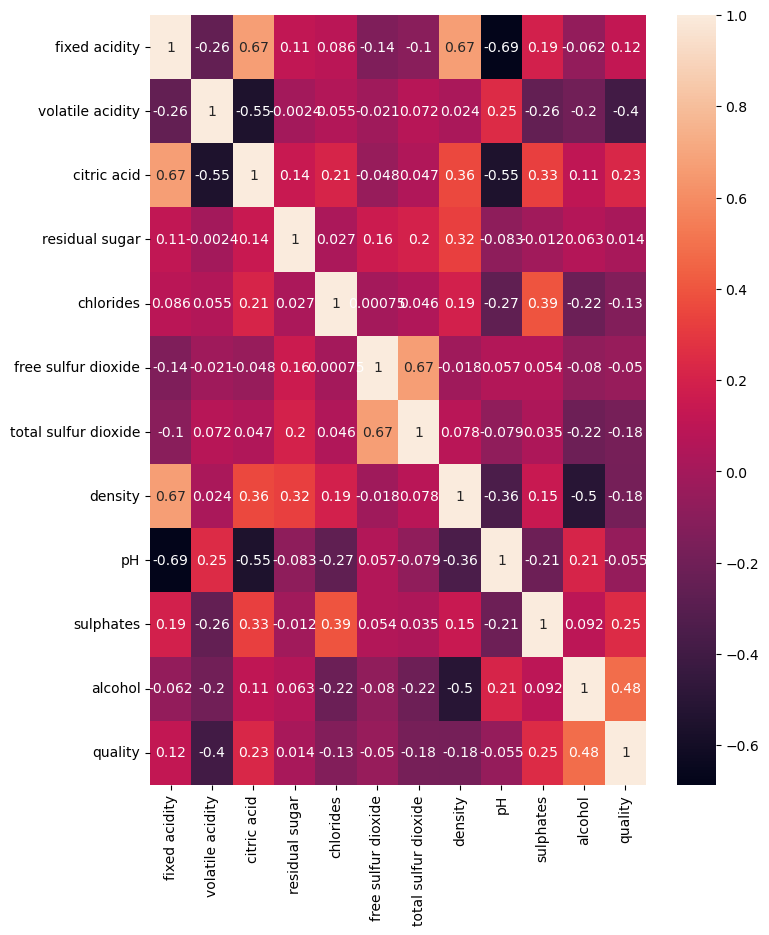

In [74]:
wine_corr=wine1.corr()
plt.figure(figsize=(8,10))
sen.heatmap(wine_corr,annot=True)
plt.show()

<Axes: >

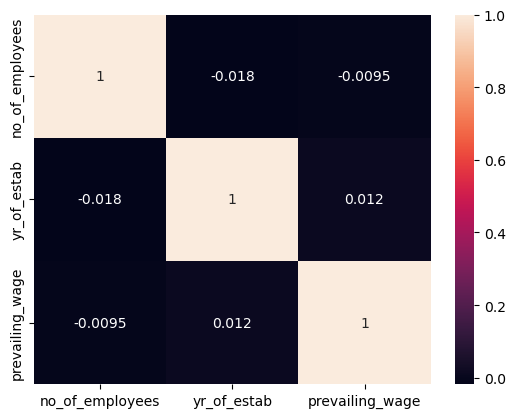

In [77]:
visa=visa_df.corr(numeric_only=True)
sen.heatmap(visa,annot=True)

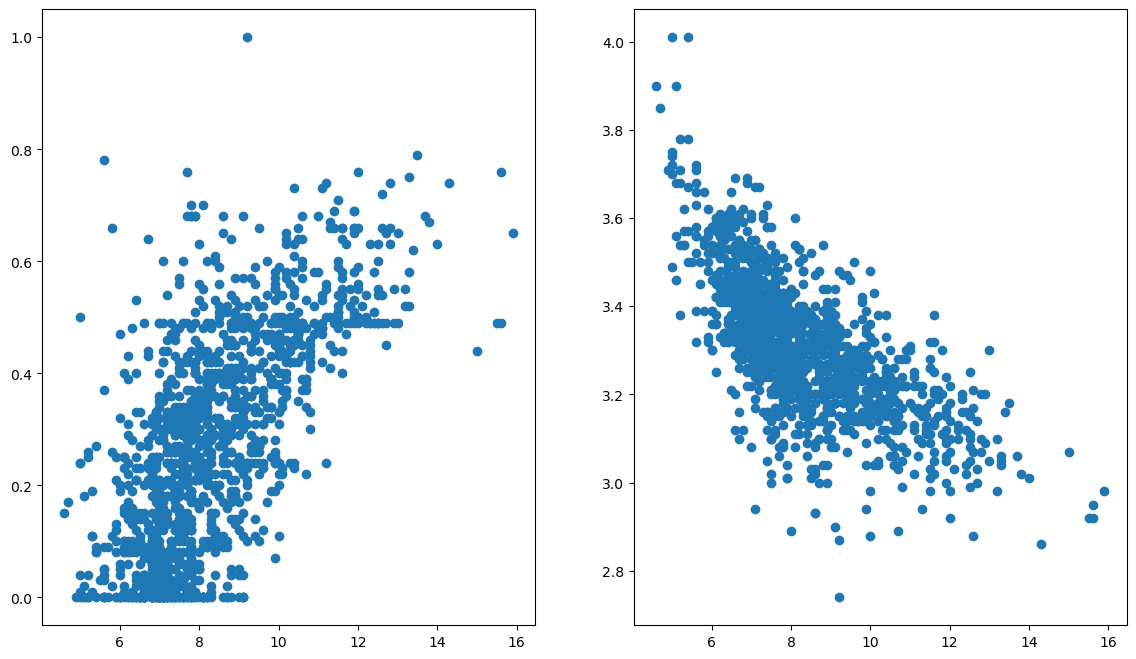

In [88]:
plt.figure(figsize=(14,8))
col1=wine1['fixed acidity']
col2=wine1['citric acid']
col3=wine1['pH']
plt.subplot(1,2,1).scatter(col1,col2)
plt.subplot(1,2,2).scatter(col1,col3)